# Histogram vs Kernel Density Estimation

## Fig 6.1 Bis

In [183]:
"""
Histogram vs Kernel Density Estimation
--------------------------------------
Figure 6.1

Density estimation using histograms and kernels. The top panels show two
histogram representations of the same data (shown by plus signs in the bottom
of each panel) using the same bin width, but with the bin centers of the
histograms offset by 0.25. The middle-left panel shows an adaptive histogram
where each bin is centered on an individual point and these bins can overlap.
This adaptive representation preserves the bimodality of the data. The
remaining panels show kernel density estimation using Gaussian kernels with
different bandwidths, increasing from the middle-right panel to the
bottom-right, and with the largest bandwidth in the bottom-left panel. The
trade-off of variance for bias becomes apparent as the bandwidth of the
kernels increases.
"""

'\nHistogram vs Kernel Density Estimation\n--------------------------------------\nFigure 6.1\n\nDensity estimation using histograms and kernels. The top panels show two\nhistogram representations of the same data (shown by plus signs in the bottom\nof each panel) using the same bin width, but with the bin centers of the\nhistograms offset by 0.25. The middle-left panel shows an adaptive histogram\nwhere each bin is centered on an individual point and these bins can overlap.\nThis adaptive representation preserves the bimodality of the data. The\nremaining panels show kernel density estimation using Gaussian kernels with\ndifferent bandwidths, increasing from the middle-right panel to the\nbottom-right, and with the largest bandwidth in the bottom-left panel. The\ntrade-off of variance for bias becomes apparent as the bandwidth of the\nkernels increases.\n'

In [184]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.neighbors import KernelDensity

In [185]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [186]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [187]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [188]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# Draw the random data

In [189]:
#------------------------------------------------------------
# Draw the random data
np.random.seed(1)
x = np.concatenate([np.random.normal(-0.5, 0.3, size=14),
                    np.random.normal(1, 0.3, size=7)])


In [190]:
x.shape

(21,)

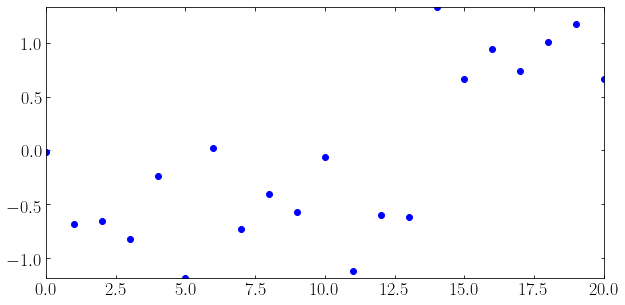

In [191]:
plt.plot(x,"ob")

# First figure: silly histogram binning

Text(0.5, 0, '$x$')

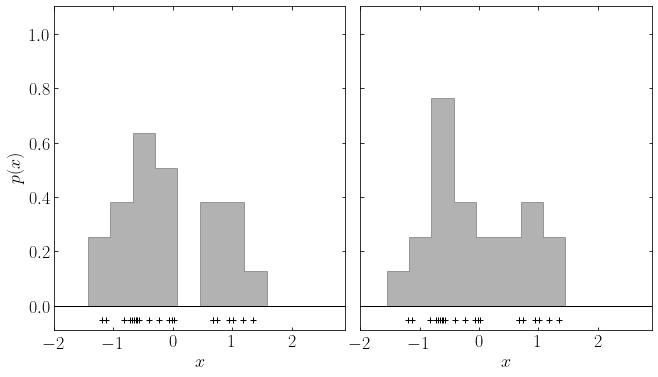

In [192]:
#------------------------------------------------------------
# First figure: silly histogram binning
fig1 = plt.figure(figsize=(10, 6))
fig1.subplots_adjust(left=0.12, right=0.95, wspace=0.05,
                     bottom=0.15, top=0.9, hspace=0.05)

FC = '#6666FF'
XLIM = (-2, 2.9)
YLIM = (-0.09, 1.1)

ax = fig1.add_subplot(121)
bins = np.linspace(-1.8, 2.7, 13)
ax.hist(x, bins=bins, density=True,histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

ax = fig1.add_subplot(122)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.hist(x, bins=bins + 0.25, density=True,histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')

# First figure: transition to KDE

In [193]:
bins

array([-1.8  , -1.425, -1.05 , -0.675, -0.3  ,  0.075,  0.45 ,  0.825,
        1.2  ,  1.575,  1.95 ,  2.325,  2.7  ])

In [194]:
Nx=len(bins)

In [195]:
XLIM 
#YLIM = (-0.09, 1.1)

(-2, 2.9)

In [196]:
X=x[:, np.newaxis]

In [197]:
#------------------------------------------------------------
# Evaluate for several models
#Xgrid = np.linspace(XLIM[0]-0.2, XLIM[1]+0.2, Nx*500)[:,np.newaxis]
Xgrid = np.linspace(-3, 4, 1000)[:,np.newaxis]
                                   
kernels = ['gaussian', 'tophat','exponential', 'epanechnikov','linear', 'cosine']
dens = []

kde1 = KernelDensity(bandwidth=0.4, kernel='gaussian')
log_dens1 = kde1.fit(X).score_samples(Xgrid)
#dens1 = X.shape[0] * np.exp(log_dens1).reshape((Ny, Nx))
dens1 = X.shape[0] * np.exp(log_dens1)

kde2 = KernelDensity(bandwidth=0.4, kernel='tophat')
log_dens2 = kde2.fit(X).score_samples(Xgrid)
#dens2 = X.shape[0] * np.exp(log_dens2).reshape((Ny, Nx))
dens2 = X.shape[0] * np.exp(log_dens2)

kde3 = KernelDensity(bandwidth=0.4, kernel='exponential')
log_dens3 = kde3.fit(X).score_samples(Xgrid)
#dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))
dens3 = X.shape[0] * np.exp(log_dens3)


kde3 = KernelDensity(bandwidth=0.4, kernel='exponential')
log_dens3 = kde3.fit(X).score_samples(Xgrid)
#dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))
dens3 = X.shape[0] * np.exp(log_dens3)

kde4 = KernelDensity(bandwidth=0.4, kernel='epanechnikov')
log_dens4 = kde4.fit(X).score_samples(Xgrid)
#dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))
dens4 = X.shape[0] * np.exp(log_dens4)

kde5 = KernelDensity(bandwidth=0.4, kernel='linear')
log_dens5 = kde5.fit(X).score_samples(Xgrid)
#dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))
dens5 = X.shape[0] * np.exp(log_dens5)


kde6 = KernelDensity(bandwidth=0.4, kernel='linear')
log_dens6 = kde6.fit(X).score_samples(Xgrid)
#dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))
dens6 = X.shape[0] * np.exp(log_dens6)


In [198]:
Xgrid.shape

(1000, 1)

In [199]:
dens1.shape

(1000,)

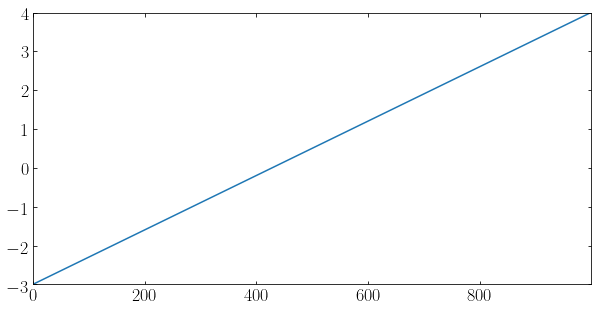

In [200]:
plt.plot(Xgrid[:,0])

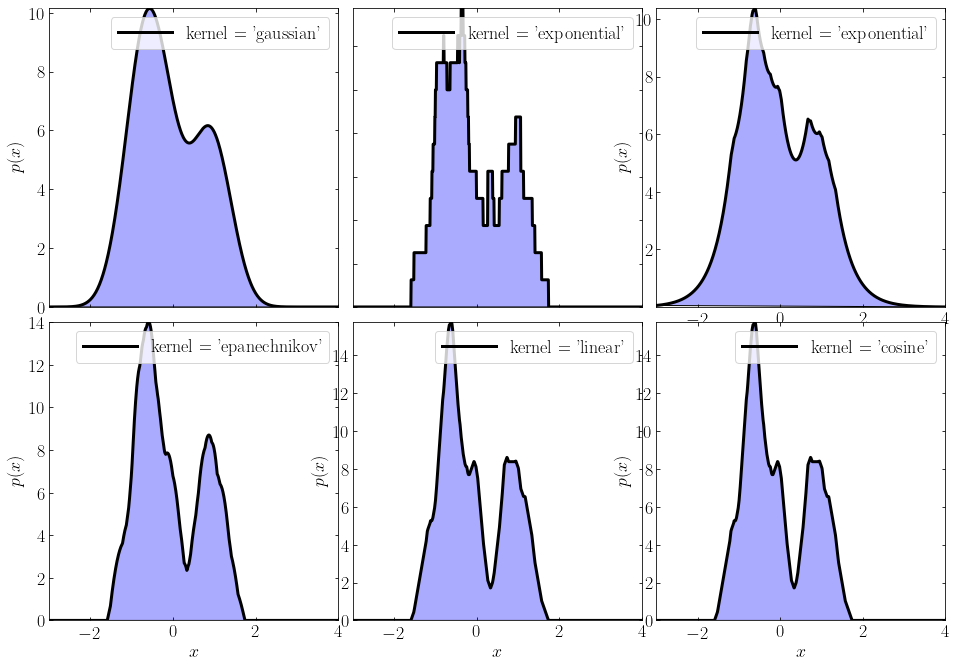

In [201]:
#------------------------------------------------------------
# First figure: transition to KDE
fig2 = plt.figure(figsize=(15, 10))
fig2.subplots_adjust(left=0.12, right=0.95, wspace=0.05,
                     bottom=0.1, top=0.95, hspace=0.05)

##-----
ax = fig2.add_subplot(231)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.fill(Xgrid[:, 0], dens1, '-k', fc='#AAAAFF')
ax.plot(Xgrid[:, 0], dens1,'k-',lw=3,label="kernel = '{0}'".format(kernels[0]))
#ax.set_xlim(XLIM)
#ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$')
ax.legend()

##-----
ax = fig2.add_subplot(232)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.fill(Xgrid[:, 0], dens2, '-k', fc='#AAAAFF')
ax.plot(Xgrid[:, 0], dens2, 'k-', lw=3,label="kernel = '{0}'".format(kernels[2]))
#ax.set_xlim(XLIM)
#ax.set_ylim(YLIM)
ax.legend()

##-----
ax = fig2.add_subplot(233)
ax.fill(Xgrid[:, 0], dens3, '-k', fc='#AAAAFF')
ax.plot(Xgrid[:, 0], dens3, 'k-', lw=3,label="kernel = '{0}'".format(kernels[2]))
#ax.set_xlim(XLIM)
#ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$')
ax.set_xlabel('$x$')
ax.legend()


##-----
ax = fig2.add_subplot(234)
ax.fill(Xgrid[:, 0], dens4, '-k', fc='#AAAAFF')
ax.plot(Xgrid[:, 0], dens4, 'k-', lw=3,label="kernel = '{0}'".format(kernels[3]))
#ax.set_xlim(XLIM)
#ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$')
ax.set_xlabel('$x$')
ax.legend()


##-----
ax = fig2.add_subplot(235)
ax.fill(Xgrid[:, 0], dens5, '-k', fc='#AAAAFF')
ax.plot(Xgrid[:, 0], dens5, 'k-', lw=3,label="kernel = '{0}'".format(kernels[4]))
#ax.set_xlim(XLIM)
#ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$')
ax.set_xlabel('$x$')
ax.legend()

##-----
ax = fig2.add_subplot(236)
ax.fill(Xgrid[:, 0], dens6, '-k', fc='#AAAAFF')
ax.plot(Xgrid[:, 0], dens6, 'k-', lw=3,label="kernel = '{0}'".format(kernels[5]))
#ax.set_xlim(XLIM)
#ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$')
ax.set_xlabel('$x$')
ax.legend()



plt.show()

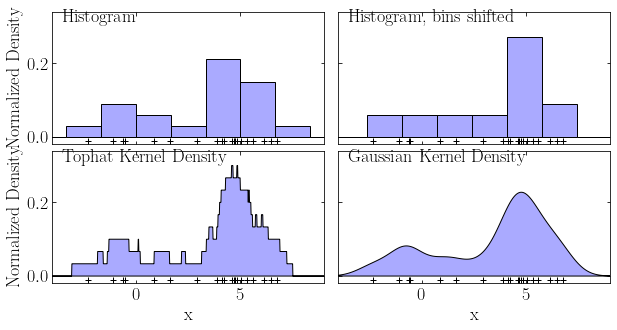

In [202]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')


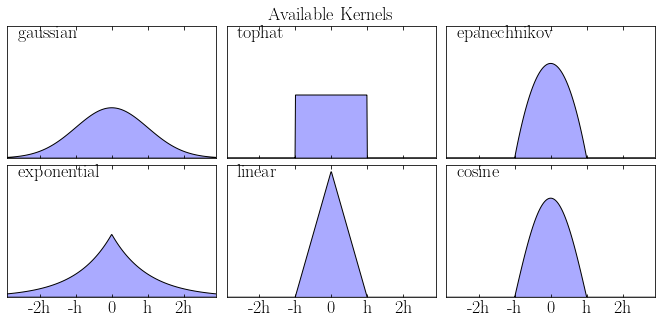

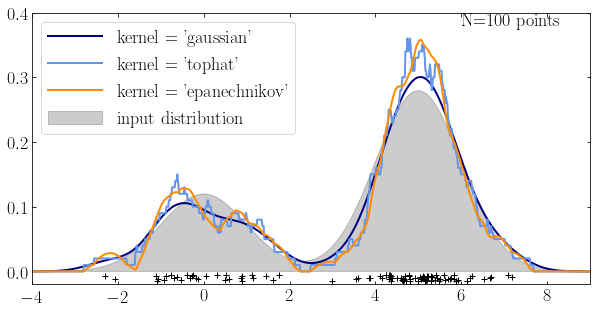

In [203]:
# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()